## 3.1 MNIST

In [2]:
from sklearn import datasets

datasets.get_data_home()

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


'/data/data/com.termux/files/home/scikit_learn_data'

In [3]:
from sklearn.datasets import fetch_mldata 
mnist = fetch_mldata('MNIST original') 
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
X, y = mnist['data'], mnist['target']

X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

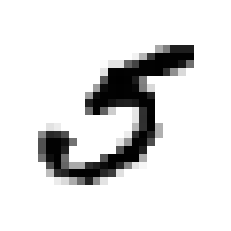

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)

shuffle_index

array([ 4434, 15164, 50579, ..., 45273, 27604, 10517])

In [9]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 이진 분류기 훈련

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
y_train_5

array([False, False, False, ..., False, False, False])

SGD 분류기

class sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)[Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier)

- Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

- This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

- This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

- The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.



In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9584, 0.9665, 0.9631])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9092 , 0.9085 , 0.91125])

정확도를 분류기의 성능 측정 지표로 사용하는 것에 문제가 있음을 알 수 있다.

### 3.3.2 오차 행렬

confusion matrix

예측값을 만들 때 cross_val_predict() 함수를 사용할 수 있다.

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)[Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)
- Compute confusion matrix to evaluate the accuracy of a classification.

- By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .

- Thus in binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .

sklearn.model_selection.cross_val_predict(estimator, X, y=None, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2\*n_jobs', method='predict')[source]

- Generate cross-validated estimates for each input data point

- The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

- Passing these predictions into an evaluation metric may not be a valid way to measure generalization performance. Results can differ from cross_validate and cross_val_score unless all tests sets have equal size and the metric decomposes over samples.



In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54115,   464],
       [ 1776,  3645]])

음성 클래스 negative class
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

양성 클래스 positive class
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)



https://sumniya.tistory.com/m/26

precision과 recall

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

재현율 recall은 민감도 sensitivity 또는 진짜 양성 비율 true positive rate(TPR)이라고도 합니다.

### 3.3.3 정밀도와 재현율

sklearn.metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision_score#sklearn.metrics.precision_score)
- Compute the precision

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

- The best value is 1 and the worst value is 0.

sklearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn.metrics.recall_score)
- Compute the recall

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The best value is 1 and the worst value is 0.

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8870771477245072

In [20]:
recall_score(y_train_5, y_train_pred)

0.6723851687880464

F1 score은 정밀도와 재현율의 조화평균 harmonic mean입니다.

sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1_score#sklearn.metrics.f1_score)
- Compute the F1 score, also known as balanced F-score or F-measure

- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

- F1 = 2 * (precision * recall) / (precision + recall)
- In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

정밀도와 재현율을 모두 얻을 수는 없습니다.

정밀도/재현율 트레이드오프 라 합니다.

어떤 경우에는 정밀도가 높은 분류기가 선호됩니다. 어떤 경우에는 정밀도가 낮더라도 재현율이 높은 경우가 괜찮습니다.

### 3.3.4 정밀도/재현율 트레이드오프 

decision_function() 메소드를 호출하면 각 샘플의 점수를 얻을 수 있습니다.

decision_function(self, X)[source]
- Predict confidence scores for samples.

- The confidence score for a sample is the signed distance of that sample to the hyperplane.

Parameters
- X: array_like or sparse matrix, shape (n_samples, n_features)
  - Samples.

Returns
- array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
  - Confidence scores per (sample, class) combination. In the binary case, confidence score for self.classes_[1] where >0 means this class would be predicted.

In [21]:
y_scores = sgd_clf.decision_function([some_digit])

y_scores

array([198912.38828099])

In [22]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

임계값을 높여보겟습니다.

In [23]:
threshold = 200000

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([False])

적절한 임계값을 정하기 위해 cross_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 합니다.

이번에는 예측 결과가 안라 결정 점수를 반환받도록 지정해야 합니다.

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
precisions, recalls, thresholds

(array([0.09075993, 0.09074471, 0.09074623, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-1702230.5764561 , -1701453.75667092, -1701190.91954238, ...,
          804028.06164652,   858501.56648982,   887984.59874372]))

sklearn.metrics.precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall_curve#sklearn.metrics.precision_recall_curve)
- Compute precision-recall pairs for different probability thresholds

- Note: this implementation is restricted to the binary classification task.

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. This ensures that the graph starts on the y axis.

Returns
- precision: array, shape = [n_thresholds + 1]
  - Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

- recall: array, shape = [n_thresholds + 1]
  - Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

- thresholds: array, shape = [n_thresholds <= len(np.unique(probas_pred))]
  - Increasing thresholds on the decision function used to compute precision and recall.

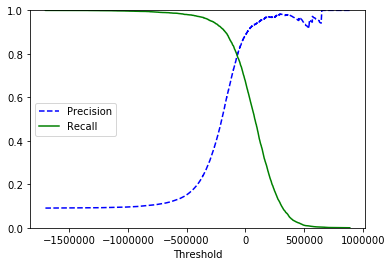

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

0.22.1 버전에 plot_precision_recall_curve() 함수가 추가되었다.

sklearn.metrics.plot_precision_recall_curve(estimator, X, y, sample_weight=None, response_method='auto', name=None, ax=None, \*\*kwargs)[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html#sklearn.metrics.plot_precision_recall_curve)
- Plot Precision Recall Curve for binary classifiers.

- Extra keyword arguments will be passed to matplotlib’s plot.

누군가가 '99% 정밀도를 달성하자'라고 말하면 반드시 '재현율 얼마에서?'라고 물어봐야 합니다.

### 3.3.5 ROC 곡선

수신기 조작 특성 receiver operating characteristic(ROC)

정밀도/재현율 그래프와 매우 비슷하지만, 정밀도에 대한 재현율 곡선이 아니고 거짓 양성 비율false positive rate(FPR)에 대한 진짜 양성 비율true positive rate(TPR, 재현율의 다른이름)의 곡선입니다. 

양성으로 잘못 분류된 음성 샘플의 비율이 FPR입니다. 이는 1 - TNR과 같습니다. TNR을 특이도 라고도 합니다.

그러므로 ROC 곡선은 민감도(재현율)에 대한 1 - 특이도 그래프입니다.

$Recall = \frac{TP}{TP+FN}$

$FPR = \frac{FP}{TN+FP}$

$TNR = \frac{TN} {TN+FP}$

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

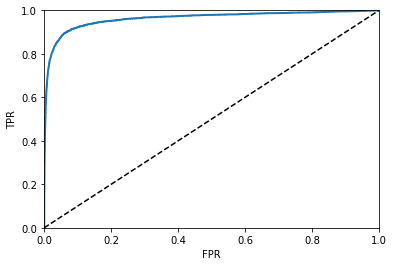

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr, tpr)
plt.show()

sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve)
- Compute Receiver operating characteristic (ROC)

- Note: this implementation is restricted to the binary classification task.

Returns
- fpr: array, shape = [>2]
  - Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

- tpr: array, shape = [>2]
  - Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

- thresholds: array, shape = [n_thresholds]
  - Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

TPR - FPR 사이에도 tradeoff 관계가 존재한다.

좋은 분류기는 왼쪽 위 모서리에 꼭지점이 위치한다.

곡선 아래의 면적 area under the curve(AUC)를 측정하면 분류기들을 비교할 수 있다.

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9626765639482208

sklearn.metrics.roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score)
- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

- Note: this implementation can be used with binary, multiclass and multilabel classification, but some restrictions apply (see Parameters).

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

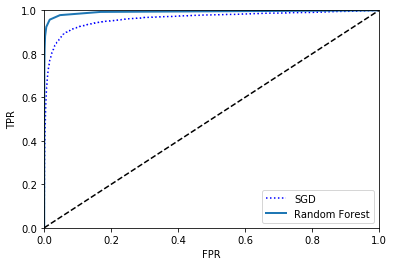

In [57]:
plt.plot(fpr, tpr, "b:", label="SGD")

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend(loc="lower right")

plt.show()

In [58]:
roc_auc_score(y_train_5, y_scores_forest)

0.9927198688136072

## 3.4 다중 분류

일대다 one-versus-all, one-versus-the-rest (OvA) 전략

일대일 one-versus-one (OvO) 전략

https://analysis-flood.tistory.com/m/77

In [59]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array([5.])

In [60]:
some_digit_scores = sgd_clf.decision_function([some_digit])

some_digit_scores

array([[  75480.2156035 , -456471.33489512, -373278.90080544,
        -297099.99302633, -436054.99147041,  198912.38828099,
        -713889.4642478 , -301479.42081178, -684724.23357001,
        -688137.16789777]])

In [62]:
np.argmax(some_digit_scores)

5

In [63]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [64]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [65]:
len(ovo_clf.estimators_)

45

In [66]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [67]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87102579, 0.8700435 , 0.81482222])

스케일을 조정하면 정확도를 90% 이상으로 높일 수 있다.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90911818, 0.91079554, 0.91123669])

random forest 모델의 정확도가 더 우수하다.

In [69]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94261148, 0.94044702, 0.93994099])

## 3.5 에러 분석

confusion matrix를 살펴볼 수 있다.

cross_valpredict() 함수를 사용해 예측을 만들고 confusion_matrix() 함수를 호출한다.

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

array([[5728,    2,   25,   10,   12,   48,   43,   10,   40,    5],
       [   1, 6501,   44,   25,    6,   35,    5,    8,  105,   12],
       [  47,   35, 5378,   86,   82,   21,   88,   57,  152,   12],
       [  47,   46,  142, 5333,    3,  225,   36,   54,  147,   98],
       [  14,   26,   39,   10, 5354,    9,   56,   34,   86,  214],
       [  67,   47,   38,  179,   80, 4602,  114,   33,  178,   83],
       [  35,   29,   48,    4,   42,   85, 5622,    7,   46,    0],
       [  27,   26,   68,   29,   47,   10,    6, 5794,   17,  241],
       [  47,  159,   73,  163,   18,  153,   59,   25, 5018,  136],
       [  41,   32,   25,   84,  153,   34,    3,  198,   86, 5293]])

matshow() 함수

matplotlib.pyplot.matshow(A, fignum=None, \*\*kwargs)[source](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow)
- Display an array as a matrix in a new figure window.

- The origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally. The aspect ratio of the figure window is that of the array, unless this would make an excessively short or narrow figure.

- Tick labels for the xaxis are placed on top.



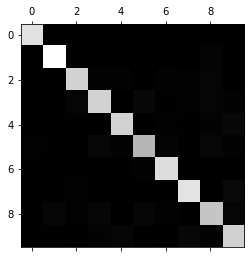

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 비교해 본다.

In [74]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx / row_sums

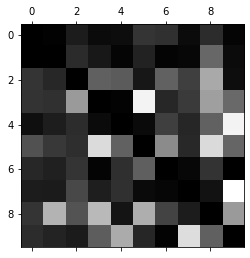

In [75]:
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [77]:
def plot_digit(data): 
    image = data.reshape(28, 28) 
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest") 
    plt.axis("off")

In [79]:
def plot_digits(instances, images_per_row=10, **options): 
    size = 28 
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty))) 
    for row in range(n_rows): 
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

NameError: name 'save_fig' is not defined

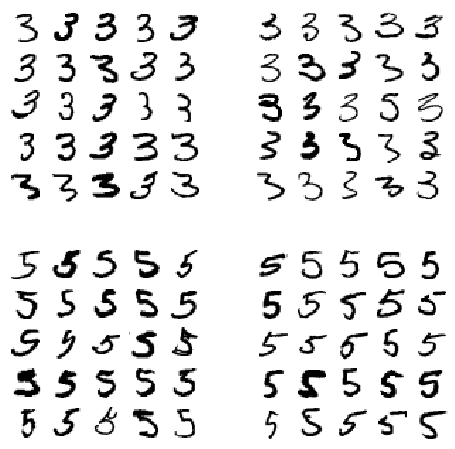

In [80]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

## 3.6 다중 레이블 분류

multilabel classification system

In [82]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
knn_clf.predict([some_digit])

array([[False,  True]])

## 3.7 다중 출력 분류

MNIST 이미지에 numpy의 randint() 함수를 사용해 픽셀 강도에 노이즈를 추가하겠습니다.

In [2]:
import numpy as np
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

NameError: name 'X_train' is not defined